In [1]:
import os
import boto3

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
s3 = boto3.client("s3")

filename = "weight-height.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/weight-height.csv", filename)
df = pd.read_csv(filename)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

<AxesSubplot:title={'center':'Weight vs. Height'}, xlabel='Weight', ylabel='Height'>

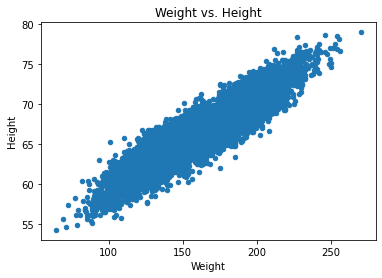

In [5]:
df.plot.scatter(x='Weight',
                y='Height',
                title='Weight vs. Height')

In [6]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

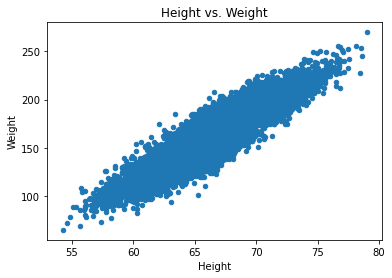

In [7]:
_ = df.plot.scatter(x='Height',
                    y='Weight',
                    title='Height vs. Weight')

<AxesSubplot:title={'center':'Male & Female Populations'}, xlabel='Height', ylabel='Weight'>

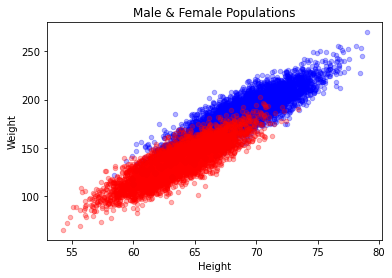

In [8]:
males = df[df['Gender'] == 'Male']
females = df.query("Gender == 'Female'")

fig,ax = plt.subplots()
males.plot.scatter(x='Height',
                   y='Weight',
                   ax=ax,
                   color='blue',
                   alpha=0.3,
                   title='Male & Female Populations')

females.plot.scatter(x='Height',
                   y='Weight',
                   ax=ax,
                   color='red',
                   alpha=0.3)

<AxesSubplot:title={'center':'Male & Female Populations'}, xlabel='Height', ylabel='Weight'>

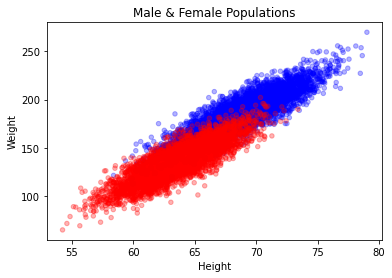

In [9]:
df['Gendercolor'] = df['Gender'].map({'Male':'blue',
                                      'Female':'red'})
df.plot.scatter(x='Height',
                y='Weight',
                c=df['Gendercolor'],
                alpha=0.3,
                title='Male & Female Populations')

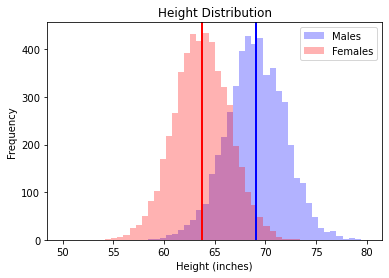

In [15]:
males['Height'].plot(kind='hist',
                     bins=50,
                     range=(50,80),
                     alpha=0.3, 
                     color='blue')

females['Height'].plot(kind='hist',
                     bins=50,
                     range=(50,80),
                     alpha=0.3, 
                     color='red')

plt.title('Height Distribution')
plt.legend(['Males','Females'])
plt.xlabel("Height (inches)")

plt.axvline(males['Height'].mean(), color='blue', linewidth=2)
plt.axvline(females['Height'].mean(), color='red', linewidth=2)

In [19]:
dfpvt = df.pivot(columns='Gender',values='Weight')


In [21]:
dfpvt

Gender      Female        Male
0              NaN  241.893563
1              NaN  162.310473
2              NaN  212.740856
3              NaN  220.042470
4              NaN  206.349801
...            ...         ...
9995    136.777454         NaN
9996    170.867906         NaN
9997    128.475319         NaN
9998    163.852461         NaN
9999    113.649103         NaN

[10000 rows x 2 columns]

In [22]:
dfpvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Female  5000 non-null   float64
 1   Male    5000 non-null   float64
dtypes: float64(2)
memory usage: 234.4 KB


Text(0, 0.5, 'Weight (lbs)')

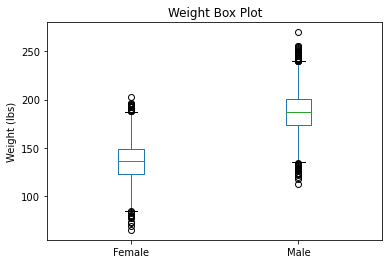

In [24]:
dfpvt.plot(kind='box')
plt.title('Weight Box Plot')
plt.ylabel('Weight (lbs)')